# Machine Learning Model

In [65]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

### 1. Clean & Prepare Dataset

In [66]:
# Read csv into dataframe
df = pd.read_csv(os.path.join("Resources", "customer_data.csv"))
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [67]:
# Check for null values
for x in df:
    print(f' Column {x}: Unique Value(s): {pd.isna(df[x]).unique()}') 

 Column id: Unique Value(s): [False]
 Column Gender: Unique Value(s): [False]
 Column Age: Unique Value(s): [False]
 Column Driving_License: Unique Value(s): [False]
 Column Region_Code: Unique Value(s): [False]
 Column Previously_Insured: Unique Value(s): [False]
 Column Vehicle_Age: Unique Value(s): [False]
 Column Vehicle_Damage: Unique Value(s): [False]
 Column Annual_Premium: Unique Value(s): [False]
 Column Policy_Sales_Channel: Unique Value(s): [False]
 Column Vintage: Unique Value(s): [False]
 Column Response: Unique Value(s): [False]


In [68]:
# Drop id column because it is not a customer's attribute
df = df.drop(columns=['id'])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [69]:
# Check data types
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [70]:
# Convert objects in Gender column into numeric values
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

In [71]:
# Convert objects in Vehicle Age column into numeric values
df['Vehicle_Age'] = df['Vehicle_Age'].replace('< 1 Year', 1)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('1-2 Year', 2)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('> 2 Years', 3)

In [72]:
# Convert objects in Vehicle Damage column into numeric values
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('Yes', 1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('No', 0)

In [73]:
# Check data types again to ensure all objects are converted
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [74]:
# Check the number of response types: 0 and 1
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [75]:
# Separate majority & minority classes for undersampling
df_majority = df[df.Response==0]
df_minority = df[df.Response==1]

In [76]:
# Import module for resampling
from sklearn.utils import resample

# Downsample majority class
df_majority_ds = resample(df_majority,
                         replace=False,
                         n_samples=46710,
                         random_state=123)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_ds, df_minority])

# Check new class counts
df_downsampled['Response'].value_counts()

1    46710
0    46710
Name: Response, dtype: int64

In [77]:
# View dataframe
df_downsampled.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
369337,0,24,1,5.0,1,1,0,24622.0,152.0,52,0
375951,1,22,1,28.0,1,1,0,33999.0,152.0,29,0
242310,0,22,1,46.0,1,1,0,37155.0,152.0,184,0
181436,1,74,1,28.0,0,2,1,35658.0,26.0,31,0
27046,1,43,1,28.0,0,2,1,25405.0,26.0,71,0


In [78]:
# Reset index of dataframe
df_downsampled.reset_index(inplace=True)

In [79]:
# View dataframe again
df_downsampled.head()

,index,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,369337,0,24,1,5.0,1,1,0,24622.0,152.0,52,0
1,375951,1,22,1,28.0,1,1,0,33999.0,152.0,29,0
2,242310,0,22,1,46.0,1,1,0,37155.0,152.0,184,0
3,181436,1,74,1,28.0,0,2,1,35658.0,26.0,31,0
4,27046,1,43,1,28.0,0,2,1,25405.0,26.0,71,0


In [80]:
# Drop the "index" column
df_downsampled = df_downsampled.drop(columns=['index'])

df_downsampled.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,24,1,5.0,1,1,0,24622.0,152.0,52,0
1,1,22,1,28.0,1,1,0,33999.0,152.0,29,0
2,0,22,1,46.0,1,1,0,37155.0,152.0,184,0
3,1,74,1,28.0,0,2,1,35658.0,26.0,31,0
4,1,43,1,28.0,0,2,1,25405.0,26.0,71,0


### 2. Run K Nearest Neighborbors Algorithm

In [81]:
y = df_downsampled['Response']

In [82]:
X = df_downsampled.drop('Response', axis=1)
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,24,1,5.0,1,1,0,24622.0,152.0,52
1,1,22,1,28.0,1,1,0,33999.0,152.0,29
2,0,22,1,46.0,1,1,0,37155.0,152.0,184
3,1,74,1,28.0,0,2,1,35658.0,26.0,31
4,1,43,1,28.0,0,2,1,25405.0,26.0,71


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [84]:
# Loop through different k values to see which has the highest accuracy - UNSCALED DATA
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.573
k: 3, Train/Test Score: 0.785/0.590
k: 5, Train/Test Score: 0.732/0.594
k: 7, Train/Test Score: 0.705/0.595
k: 9, Train/Test Score: 0.690/0.595
k: 11, Train/Test Score: 0.679/0.597
k: 13, Train/Test Score: 0.670/0.600
k: 15, Train/Test Score: 0.662/0.600
k: 17, Train/Test Score: 0.656/0.599
k: 19, Train/Test Score: 0.652/0.598
k: 21, Train/Test Score: 0.648/0.600
k: 23, Train/Test Score: 0.645/0.597
k: 25, Train/Test Score: 0.641/0.596
k: 27, Train/Test Score: 0.637/0.596
k: 29, Train/Test Score: 0.635/0.595
k: 31, Train/Test Score: 0.632/0.595
k: 33, Train/Test Score: 0.629/0.595
k: 35, Train/Test Score: 0.627/0.594
k: 37, Train/Test Score: 0.626/0.594
k: 39, Train/Test Score: 0.624/0.597
k: 41, Train/Test Score: 0.622/0.595
k: 43, Train/Test Score: 0.620/0.594
k: 45, Train/Test Score: 0.619/0.593
k: 47, Train/Test Score: 0.617/0.595
k: 49, Train/Test Score: 0.618/0.594


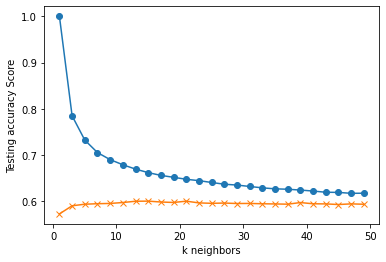

In [85]:
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [95]:
# k = 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test, y_test))

k=17 Test Acc: 0.599


Cross check accurancy using the square root method

In [88]:
# K using square root method i.e. 93,420^(1/2)
knn = KNeighborsClassifier(n_neighbors=306)
knn.fit(X_train, y_train)
print('k=306 Test Acc: %.3f' % knn.score(X_test, y_test))

k=306 Test Acc: 0.573


Conclusion: Accuracy level is worse in the downsampled dataset than in the original one.

In [89]:
# Use KNN model to predict responses
predictions = knn.predict(X_test)
print(f'First 10 predictions: {predictions[:10]}')
print(f'First 10 actual responses: {y_test[:10].tolist()}')

First 10 predictions: [1 0 1 1 0 1 1 0 1 1]
First 10 actual responses: [1, 1, 1, 0, 0, 0, 0, 1, 0, 1]


In [90]:
# Create dataframe to compare predictions & actual responses
predict_df = pd.DataFrame({'Predictions': predictions, 'Actual': y_test}).reset_index(drop=True)
predict_df

,Predictions,Actual
0,1,1
1,0,1
2,1,1
3,1,0
4,0,0
...,...,...
23350,0,0
23351,1,1
23352,0,0
23353,1,1


In [91]:
# Check if we have predicted any 'positive' response
check = predict_df[predict_df['Predictions'] == 1]
check

,Predictions,Actual
0,1,1
2,1,1
3,1,0
5,1,0
6,1,0
...,...,...
23346,1,0
23348,1,0
23351,1,1
23353,1,1


In [92]:
# Check how many times we have correctly predicted the responses
correct_predict = predict_df[predict_df['Predictions'] == predict_df['Actual']]
correct_predict.count()

Predictions    13383
Actual         13383
dtype: int64

In [93]:
print(f'Percentage of correct predictions: {correct_predict.count()/predict_df.count()}')

Percentage of correct predictions: Predictions    0.573025
Actual         0.573025
dtype: float64


In [94]:
# Check where we have correctly predicted the positive responses
correct_positive = predict_df.loc[(predict_df['Predictions'] == predict_df['Actual']) & (predict_df['Predictions'] == 1)]
correct_positive

,Predictions,Actual
0,1,1
2,1,1
9,1,1
15,1,1
16,1,1
...,...,...
23342,1,1
23344,1,1
23351,1,1
23353,1,1


### 3. Save the Trained Model

In [58]:
# import joblib
  
# # Save the model as a pickle in a file 
# joblib.dump(knn, 'recommender_model.pkl') 

['recommender_model.pkl']

In [59]:
# # Load the model from the file 
# knn_from_joblib = joblib.load('recommender_model.pkl')  
  
# # Use the loaded model to make predictions 
# knn_from_joblib.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)